In [53]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("Housing.csv")
x=dataset.iloc[:,1:]
y= dataset.iloc[:,0].values.reshape(-1,1)
encode_column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),encode_column),('area',StandardScaler(),['area'])],remainder='passthrough')
x = ct.fit_transform(x)
sc= StandardScaler()

x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)

nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")
history=nn_model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=100)

In [54]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

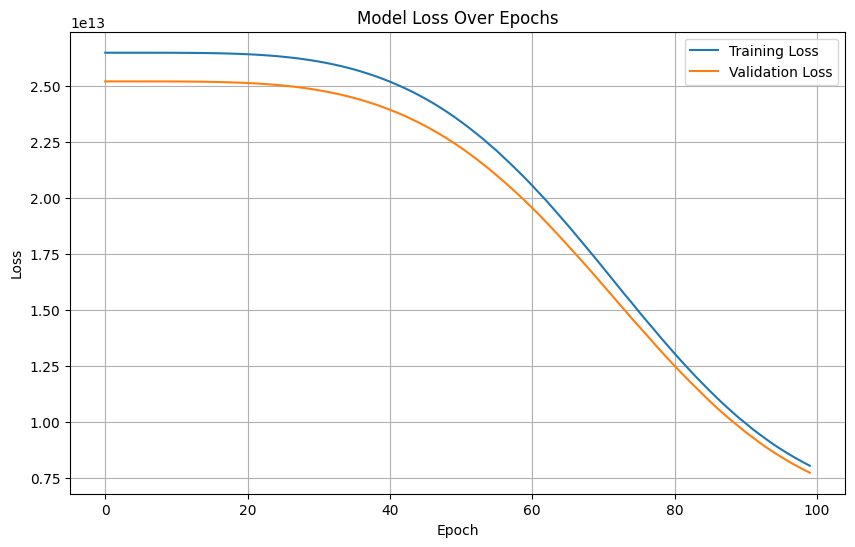

In [55]:
plot_loss(history)

In [56]:
from sklearn.metrics import root_mean_squared_error
y_pred= nn_model.predict(x_test)
root_mean_squared_error(y_test,y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


2777753.25

In [57]:
y.mean(), y.std()


(np.float64(4766729.247706422), np.float64(1868722.8281312082))